# Evaluating K-Means Clusters with the Iris Dataset

## Introduction

This project was completed during the General Assembly Data Science Immersive course. The aim of this project is to see if it is posible to decyther the number of species the Iris dataset has through use of K-Means clustering. This technique splits data by creating a creating a specified number of centroids, and iterating over data points until each point is assigned to each centroid. The centroids readjust based on the average location of data in that cluster. 

### Import Libraries

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from sklearn import datasets
import seaborn as sns

### Import the data

In [3]:
df = sns.load_dataset("iris")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


###  Plot the data to visually estimate to correct number of clusters

Most diagrams show data points divided into two disctinct clusters. One of those two clusters is quite large and spread, however, so it could be two clusers. This relationship can be repeatedly observed through each combination of 2D plots.

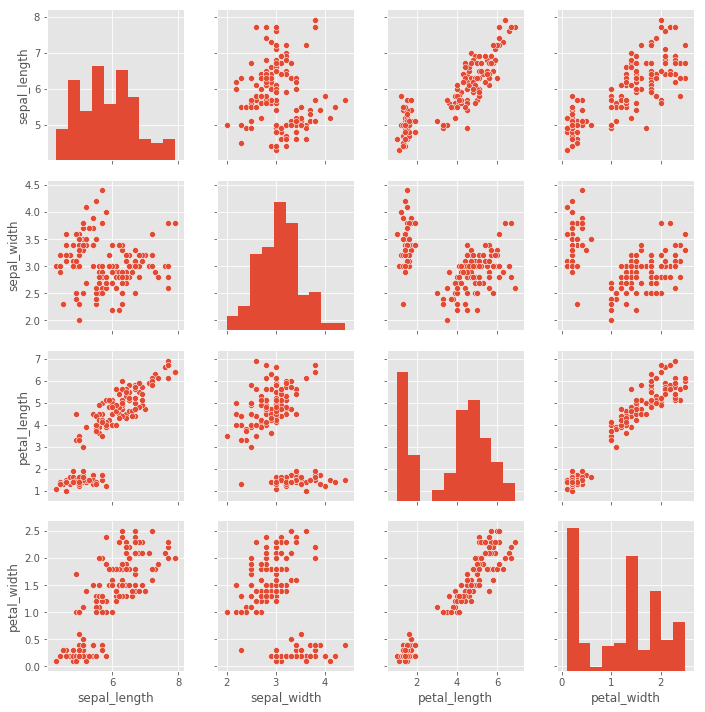

In [12]:
sns.pairplot(df)

### Cluster the data using K-Means

Based on the analysis above, both clusters of 2 and 3 will be attempted.

#### Attempt with 2 Clusters

In [11]:
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters=2, random_state=0).fit(df[['sepal_length','sepal_width','petal_length','petal_width']
])

predicted_2 = model.labels_
centroids_2 = model.cluster_centers_

In [23]:
df_2 = df.copy()

In [24]:
df_2['predicted'] = predicted_2

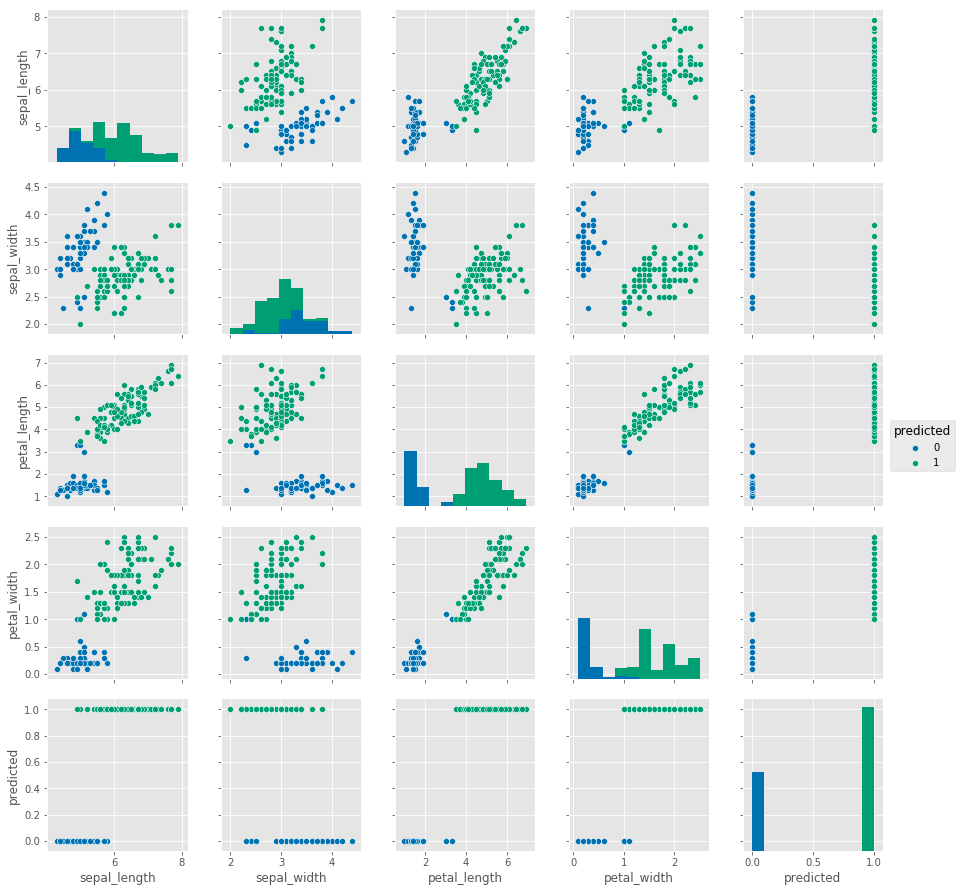

In [25]:
sns.pairplot(df_2[['sepal_length','sepal_width','petal_length','petal_width', 'predicted']], hue = 'predicted', palette = 'colorblind')

#### Attempt with 3 Clusters

In [14]:
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters=3, random_state=0).fit(df[['sepal_length','sepal_width','petal_length','petal_width']
])

predicted_3 = model.labels_
centroids_3 = model.cluster_centers_

In [26]:
df_3 = df.copy()

In [27]:
df_3['predicted'] = predicted_3

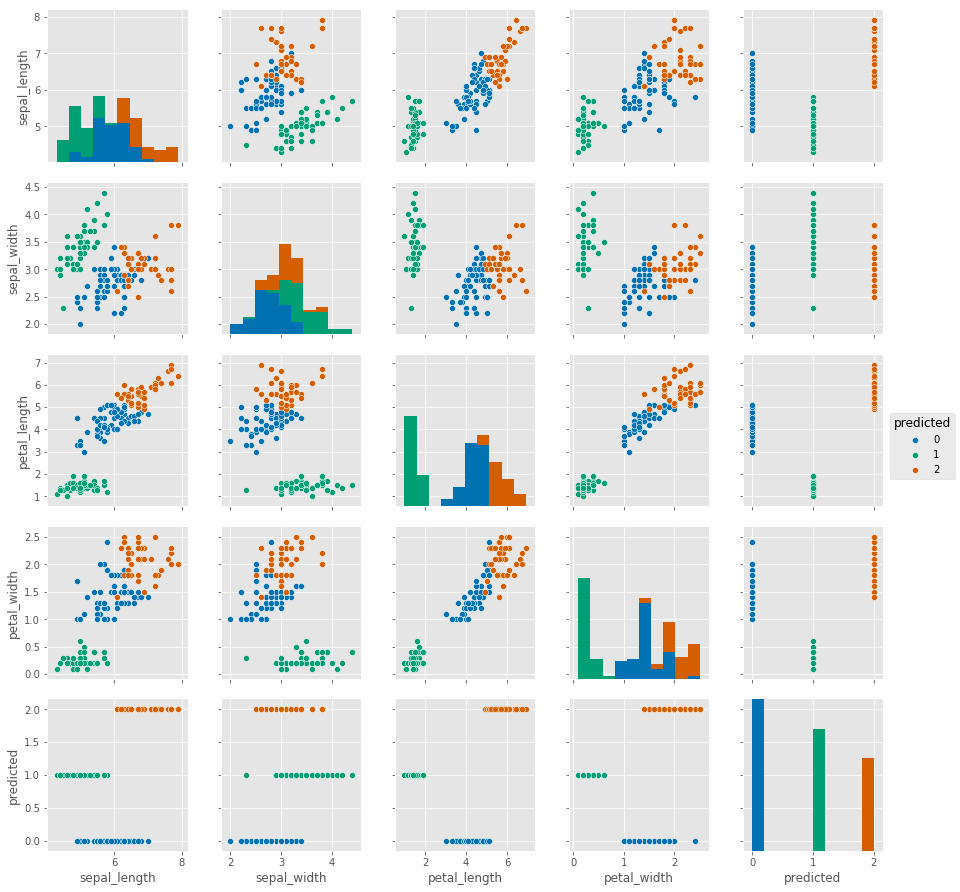

In [28]:
sns.pairplot(df_3[['sepal_length','sepal_width','petal_length','petal_width', 'predicted']], hue = 'predicted', palette = 'colorblind')

### Evaluation

So far, it is unclear what is the true number of clusters. Two clusters seem to fit in quite nicely, but 3 clusters also achieve a (messier) divide. 

### Observe the Centroids

Observing the centroids will allow seeing the 'center point' that each cluster gravitated to. This could provide insight into whether the clusters make sense.

Looking at the clusters below, the 2-cluster chart shows a very wide spread for the top right cluster. Meanwhile, the bottom-left cluster is definitely one species. On the other hand, the 3-cluster graph shows a potentially reasonable division in the top-right, as there is not a massive spread from each centroid.

In [18]:
centroids_2

array([[ 5.00566038,  3.36981132,  1.56037736,  0.29056604],
       [ 6.30103093,  2.88659794,  4.95876289,  1.69587629]])

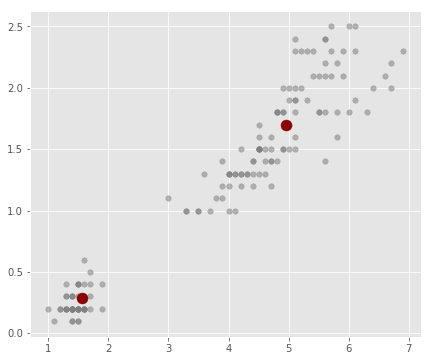

In [21]:
fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(df.petal_length, df.petal_width, c='grey', alpha=0.55, s=30)
ax.scatter(centroids_2[:,2], centroids_2[:,3], c='darkred', s=120)
plt.show()

In [19]:
centroids_3

array([[ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 5.006     ,  3.428     ,  1.462     ,  0.246     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

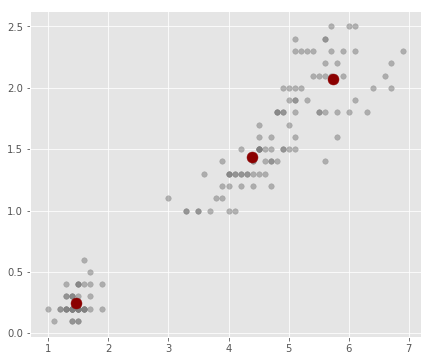

In [22]:
fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(df.petal_length, df.petal_width, c='grey', alpha=0.55, s=30)
ax.scatter(centroids_3[:,2], centroids_3[:,3], c='darkred', s=120)
plt.show()

### Compute the silhoutte score for the clusters.

The silhouette scores calculate the separation and coherence of the clusters. The score is greater on the 2-cluster model, as the 3-cluster model contains two merged groups of data.

Silhouette Score for 2 Clusters

In [29]:
from sklearn.metrics import silhouette_score
silhouette_score(df_2[['sepal_length','sepal_width','petal_length','petal_width', 'predicted']], predicted, metric='euclidean')

0.69388562335290593

Silhouette Score for 3 Clusters

In [30]:
from sklearn.metrics import silhouette_score
silhouette_score(df_3[['sepal_length','sepal_width','petal_length','petal_width', 'predicted']], predicted, metric='euclidean')

0.62134688877493682

### Silhouette score for multiple cluster ranges

Viewing the Silhouette Score across multiple clusters allows seeing the scores within a wide range of values. It can be observed that the best score is at 2 clusters, and drops from then onwards.

In [75]:
sil_scores = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    sil_score = silhouette_score(X, kmeans.labels_, metric='euclidean')
    sil_scores.append(sil_score)

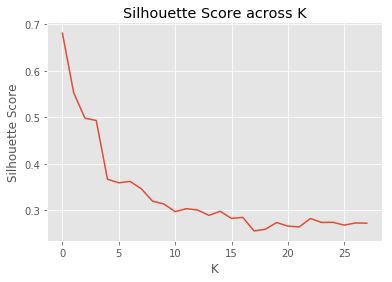

In [76]:
plt.plot(sil_scores)
plt.ylabel("Silhouette Score")
plt.xlabel("K")
plt.title("Silhouette Score across K")
sns.despine()

### Inertia score for multiple cluster ranges

Inertia is the sum of squared distances of samples to their closest cluster center. It provides another measure to observe clusters. Again, the best cluster is 2, and drops from then onwards.

In [57]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]

In [58]:
inertias = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertias.append(inertia.mean())



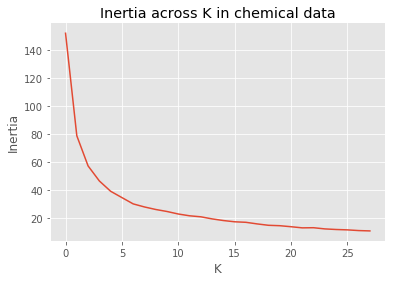

In [63]:
plt.plot(inertias)
plt.ylabel("Inertia")
plt.xlabel("K")
plt.title("Inertia across K in chemical data")
sns.despine()


### Conclusion

This exercise is a good example of how a thorough analysis does not always provide the best results. In this example - the real number of clusters was 3, as the Iris Dataset has 3 species. However, various scores, as well as visualisation, hinted that a cluster of 2 was ideal. The only counter-evidence was the large spread around the centroid - hinting that 3 may be the answer.

It is important to be critical when employin clustering techniques to obtain objective results, such as in this case with plant species. Clustering it much more flexible when obtaining subjective results, such as a business customer segmentation analysis, where customers can be grouped in various ways.